In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [54]:
data = pd.read_csv('../house_prices_selection.csv')
data_select = data[[
    "SalePrice", "LotFrontage", "ZoningScore", "EVI", "LotArea", "Price_per_m^2", "PDI",
    "MSZoning_RL", "LotConfig_CulDSac", "LandContour_HLS", "LotShape_IR2", "Condition1_Norm", "Condition1_Feedr", "LotShape_Reg", "MSZoning_RM", "WoodDeckSF", "OpenPorchSF",
    "FullBath", "GarageCars", "GarageArea", "KitchenQual", "PavedDrive", "OverallQual", "YearBuilt",
    "YearRemodAdd", "MasVnrArea", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "BsmtQual", "CentralAir", "Foundation"
]]

In [63]:
data_select.describe()

,SalePrice,LotFrontage,ZoningScore,EVI,LotArea,Price_per_m^2,PDI,WoodDeckSF,OpenPorchSF,FullBath,GarageCars,GarageArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,TotalBsmtSF,1stFlrSF
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,70.049958,0.762751,0.393402,10516.828082,226.794381,0.407862,94.244521,46.660274,1.565068,1.767123,472.980137,6.099315,1971.267808,1984.865753,103.685262,1515.463699,1057.429452,1162.626712
std,79442.502883,24.284752,0.186787,0.104995,9981.264932,133.338628,0.089535,125.338794,66.256028,0.550916,0.747315,213.804841,1.382997,30.202904,20.645407,181.066207,525.480383,438.705324,386.587738
min,34900.000000,21.000000,0.000000,0.034527,1300.000000,14.966588,0.041972,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,0.000000,334.000000
25%,129975.000000,59.000000,0.835044,0.341738,7553.500000,148.274389,0.376628,0.000000,0.000000,1.000000,1.000000,334.500000,5.000000,1954.000000,1967.000000,0.000000,1129.500000,795.750000,882.000000
50%,163000.000000,69.000000,0.835044,0.383193,9478.500000,192.207232,0.401678,0.000000,25.000000,2.000000,2.000000,480.000000,6.000000,1973.000000,1994.000000,0.000000,1464.000000,991.500000,1087.000000
75%,214000.000000,80.000000,0.835044,0.426384,11601.500000,255.847831,0.446201,168.000000,68.000000,2.000000,2.000000,576.000000,7.000000,2000.000000,2004.000000,166.000000,1776.750000,1298.250000,1391.250000
max,755000.000000,313.000000,1.000000,0.907037,215245.000000,1026.711897,0.863086,857.000000,547.000000,3.000000,4.000000,1418.000000,10.000000,2010.000000,2010.000000,1600.000000,5642.000000,6110.000000,4692.000000


In [55]:
# average, median, max, min of numerical columns
numerical_cols = data_select.select_dtypes(include=['int64', 'float64'])
categorical_cols = data_select.select_dtypes(include=['object'])


In [57]:
print(f"Numerical columns: {len(numerical_cols)}\nCategorical columns: {len(categorical_cols)}")

Numerical columns: 1460
Categorical columns: 1460


In [58]:
data_select.isna().sum()

SalePrice              0
LotFrontage          259
ZoningScore            0
EVI                    0
LotArea                0
Price_per_m^2          0
PDI                    0
MSZoning_RL            0
LotConfig_CulDSac      0
LandContour_HLS        0
LotShape_IR2           0
Condition1_Norm        0
Condition1_Feedr       0
LotShape_Reg           0
MSZoning_RM            0
WoodDeckSF             0
OpenPorchSF            0
FullBath               0
GarageCars             0
GarageArea             0
KitchenQual            0
PavedDrive             0
OverallQual            0
YearBuilt              0
YearRemodAdd           0
MasVnrArea             8
GrLivArea              0
TotalBsmtSF            0
1stFlrSF               0
BsmtQual              37
CentralAir             0
Foundation             0
dtype: int64

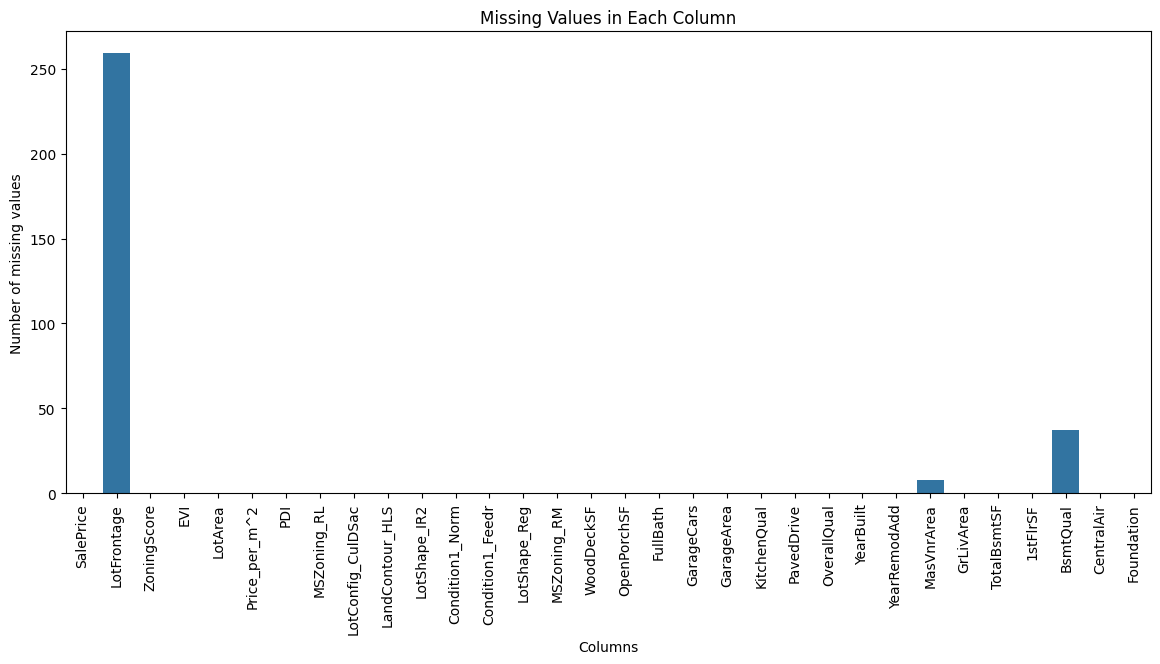

In [59]:
plt.figure(figsize=(14,6))
sns.barplot(y=data_select.isna().sum(),  x=data_select.columns)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.title('Missing Values in Each Column')
plt.show()

In [61]:
pearson_correlation = numerical_cols.corr(method='pearson')["SalePrice"]
print(pearson_correlation.sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
LotFrontage      0.351799
ZoningScore      0.327963
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EVI              0.310878
Price_per_m^2    0.273401
LotArea          0.263843
PDI              0.252049
Name: SalePrice, dtype: float64


OverallQual and GrLivArea have the most significant positive correlation with SalePrice, which is not a surprise, given the quality and the size of the house are key factors in determining its price. LotFrontage has 259 missing values, which amounts to around 25% of the whole column. Aside from that, BsmtQual and MasVnrArea also have some missing values, but they are relatively low compared to LotFrontage.